<a href="https://colab.research.google.com/github/hasanahmedfaisal/objectDetection/blob/master/objectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#intial code after serval expermintaion for pytorch


In [0]:
from PIL import Image

#workaround

!pip install --no-cache-dir -I pillow
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
print("done!")
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

print("done!")


     |████████████████████████████████| 2.1MB 6.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


done!
done!


In [0]:
#PYDRIVE AND GOOGLE AUTHENTICATION CELL

# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
driveauth = GoogleDrive(gauth)

In [0]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from pathlib import Path

drive_path = Path('/content/gdrive/My Drive/')

In [0]:
# Imports here
import torch 
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from PIL import Image



In [0]:
import pandas as pd
import os
import cv2


#utils for tensorflow

In [0]:
%cd /content/

/content


In [0]:
!ls

adc.json     gdrive					 MultiObjectTracking
content      Insight-MVT_Annotation_Train_Masked	 object_detection
data	     Insight-MVT_Annotation_Train_Masked.tar.gz  sample_data
data.tar.gz  models


In [0]:
!apt-get install -y -qq protobuf-compiler python-pil python-lxml
!git clone https://github.com/tensorflow/models.git
!apt-get -qq install libprotobuf-java protobuf-compiler
!cp -R models/research/object_detection/ object_detection/
!protoc object_detection/protos/*.proto --python_out=.

fatal: destination path 'models' already exists and is not an empty directory.


In [0]:
% cd models/research/
! protoc object_detection/protos/*.proto --python_out=.
% cd /content/

/content/models/research
/content


In [0]:
import sys
sys.path.append('/content/models/research/slim')
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim

env: PYTHONPATH=/content/models/research:/content/models/research/slim


#Data Prepossing

In [0]:
%cd /content/
!ls

/content
adc.json  gdrive  models  object_detection  sample_data


In [0]:
!wget -nc https://detrac-db.rit.albany.edu/Data/DETRAC-train-data.zip


--2019-08-20 11:15:46--  https://detrac-db.rit.albany.edu/Data/DETRAC-train-data.zip
Resolving detrac-db.rit.albany.edu (detrac-db.rit.albany.edu)... 169.226.48.191
Connecting to detrac-db.rit.albany.edu (detrac-db.rit.albany.edu)|169.226.48.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5614357445 (5.2G) [application/octet-stream]
Saving to: ‘DETRAC-train-data.zip’

DETRAC-train-data.z  91%[=================>  ]   4.78G  18.7MB/s    in 4m 59s  

2019-08-20 11:35:45 (16.4 MB/s) - Read error at byte 5132903872/5614357445 (Success). Retrying.

--2019-08-20 11:35:46--  (try: 2)  https://detrac-db.rit.albany.edu/Data/DETRAC-train-data.zip
Connecting to detrac-db.rit.albany.edu (detrac-db.rit.albany.edu)|169.226.48.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5614357445 (5.2G) [application/octet-stream]
Saving to: ‘DETRAC-train-data.zip’

DETRAC-train-data.z 100%[===================>]   5.23G  18.4MB/s    in 7m 34s  

2019-08-2

In [0]:
!wget -nc https://detrac-db.rit.albany.edu/Data/DETRAC-test-data.zip

--2019-08-20 11:43:31--  https://detrac-db.rit.albany.edu/Data/DETRAC-test-data.zip
Resolving detrac-db.rit.albany.edu (detrac-db.rit.albany.edu)... 169.226.48.191
Connecting to detrac-db.rit.albany.edu (detrac-db.rit.albany.edu)|169.226.48.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4238614575 (3.9G) [application/octet-stream]
Saving to: ‘DETRAC-test-data.zip’

DETRAC-test-data.zi 100%[===================>]   3.95G  18.6MB/s    in 3m 53s  

2019-08-20 11:47:24 (17.4 MB/s) - ‘DETRAC-test-data.zip’ saved [4238614575/4238614575]



In [0]:
!wget -nc  http://detrac-db.rit.albany.edu/Data/DETRAC-Train-Annotations-XML.zip

--2019-08-20 11:47:34--  http://detrac-db.rit.albany.edu/Data/DETRAC-Train-Annotations-XML.zip
Resolving detrac-db.rit.albany.edu (detrac-db.rit.albany.edu)... 169.226.48.191
Connecting to detrac-db.rit.albany.edu (detrac-db.rit.albany.edu)|169.226.48.191|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13762561 (13M) [application/octet-stream]
Saving to: ‘DETRAC-Train-Annotations-XML.zip’

DETRAC-Train-Annota 100%[===================>]  13.12M  10.1MB/s    in 1.3s    

2019-08-20 11:47:36 (10.1 MB/s) - ‘DETRAC-Train-Annotations-XML.zip’ saved [13762561/13762561]



In [0]:
!wget -nc  http://detrac-db.rit.albany.edu/Data/DETRAC-Train-Annotations-MAT.zip

--2019-08-20 11:47:49--  http://detrac-db.rit.albany.edu/Data/DETRAC-Train-Annotations-MAT.zip
Resolving detrac-db.rit.albany.edu (detrac-db.rit.albany.edu)... 169.226.48.191
Connecting to detrac-db.rit.albany.edu (detrac-db.rit.albany.edu)|169.226.48.191|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3415321 (3.3M) [application/octet-stream]
Saving to: ‘DETRAC-Train-Annotations-MAT.zip’

DETRAC-Train-Annota 100%[===================>]   3.26M  4.78MB/s    in 0.7s    

2019-08-20 11:47:50 (4.78 MB/s) - ‘DETRAC-Train-Annotations-MAT.zip’ saved [3415321/3415321]



In [0]:
%cd /content/

!ls

/content
adc.json			  gdrive
DETRAC-test-data.zip		  models
DETRAC-Train-Annotations-MAT.zip  object_detection
DETRAC-Train-Annotations-XML.zip  sample_data
DETRAC-train-data.zip


In [0]:
!unzip -q DETRAC-train-data.zip

In [0]:
!unzip -q DETRAC-Train-Annotations-XML.zip

In [0]:
%cd /content/Insight-MVT_Annotation_Train/
!ls

/content/Insight-MVT_Annotation_Train
MVI_20011  MVI_20062  MVI_39821  MVI_40171  MVI_40213  MVI_40963  MVI_63552
MVI_20012  MVI_20063  MVI_39851  MVI_40172  MVI_40241  MVI_40981  MVI_63553
MVI_20032  MVI_20064  MVI_39861  MVI_40181  MVI_40243  MVI_40991  MVI_63554
MVI_20033  MVI_20065  MVI_39931  MVI_40191  MVI_40244  MVI_40992  MVI_63561
MVI_20034  MVI_39761  MVI_40131  MVI_40192  MVI_40732  MVI_41063  MVI_63562
MVI_20035  MVI_39771  MVI_40141  MVI_40201  MVI_40751  MVI_41073  MVI_63563
MVI_20051  MVI_39781  MVI_40152  MVI_40204  MVI_40752  MVI_63521
MVI_20052  MVI_39801  MVI_40161  MVI_40211  MVI_40871  MVI_63525
MVI_20061  MVI_39811  MVI_40162  MVI_40212  MVI_40962  MVI_63544


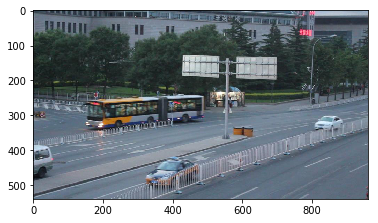

In [0]:
path = "/content/Insight-MVT_Annotation_Train/MVI_40751/img00033.jpg"

image = Image.open(path)
fig, ax = plt.subplots()
image = np.array(image)

ax.imshow(image)

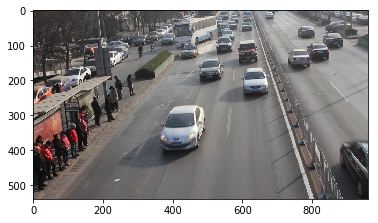

In [0]:
path = "/content/Insight-MVT_Annotation_Train/MVI_20052/img00034.jpg"

image = Image.open(path)
fig, ax = plt.subplots()
image = np.array(image)

ax.imshow(image)

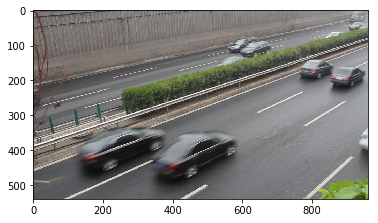

In [0]:
path = "/content/Insight-MVT_Annotation_Train/MVI_63562/img00015.jpg"

image = Image.open(path)
fig, ax = plt.subplots()
image = np.array(image)

ax.imshow(image)

#Create a blacked out images in ignored regions

In [0]:
%cd /content/
!ls

/content
adc.json			  Insight-MVT_Annotation_Train
DETRAC-test-data.zip		  models
DETRAC-Train-Annotations-MAT.zip  MVI_20011.csv
DETRAC-Train-Annotations-XML	  MVI_20011.xml
DETRAC-Train-Annotations-XML.zip  object_detection
DETRAC-train-data.zip		  sample_data
gdrive


 Import the ignored regions csv files 




In [0]:
from google.colab import files

files.upload()

Saving MVI_20011.csv to MVI_20011 (1).csv
Saving MVI_20011_i.csv to MVI_20011_i.csv
Saving MVI_20012.csv to MVI_20012.csv
Saving MVI_20012_i.csv to MVI_20012_i.csv
Saving MVI_20035.csv to MVI_20035.csv
Saving MVI_20035_i.csv to MVI_20035_i.csv
Saving MVI_39861.csv to MVI_39861.csv
Saving MVI_39861_i.csv to MVI_39861_i.csv
Saving MVI_40141.csv to MVI_40141.csv
Saving MVI_40141_i.csv to MVI_40141_i.csv
Saving MVI_40152.csv to MVI_40152.csv
Saving MVI_40152_i.csv to MVI_40152_i.csv
Saving MVI_40161.csv to MVI_40161.csv
Saving MVI_40161_i.csv to MVI_40161_i.csv


{'MVI_20011.csv': b'592.75,378.8,160.05,162.2,1,1,1\n557.65,120.98,47.2,43.06,1,2,1\n545.2,88.27,35.25,30.08,1,3,1\n508.35,67.5,28,25.925,1,4,1\n553,70.095,29.55,19.695,1,5,1\n731.1,114.23,52.4,39.95,1,6,1\n902.15,250.12,58.85,107.99,1,7,1\n594.2,391.81,161.5,149.19,2,1,1\n557.7,121.87,48.1,44.12,2,2,1\n545,88.53,35.7,30.6,2,3,1\n508.15,67.76,28.2,26.44,2,4,1\n553.35,70.185,29.7,20.035,2,5,1\n729.85,112.94,51.55,39.5,2,6,1\n894.95,238.56,66.05,107.98,2,7,1\n598.55,406.26,162.95,134.74,3,1,1\n557.75,122.76,49,45.18,3,2,1\n544.85,88.79,36.15,31.12,3,3,1\n508,68.02,28.35,26.96,3,4,1\n553.65,70.27,29.95,20.385,3,5,1\n728.65,111.64,50.7,39.07,3,6,1\n884.8,234.22,76.2,99.31,3,7,1\n595.65,422.17,171.6,118.83,4,1,1\n557.75,123.65,49.9,46.24,4,2,1\n544.65,89.05,36.6,31.64,4,3,1\n507.8,68.28,28.55,27.48,4,4,1\n554,70.355,30.1,20.73,4,5,1\n727.45,110.33,49.8,38.65,4,6,1\n880.5,225.54,80.5,103.65,4,7,1\n602.9,440.96,160.05,100.04,5,1,1\n557.8,124.54,50.8,47.3,5,2,1\n544.5,89.31,37,32.15,5,3,1\n507

In [0]:
!ls

 adc.json			   'MVI_20011 (1).csv'	 MVI_39861_i.csv
 DETRAC-test-data.zip		    MVI_20011.csv	 MVI_40141.csv
 DETRAC-Train-Annotations-MAT.zip   MVI_20011_i.csv	 MVI_40141_i.csv
 DETRAC-Train-Annotations-XML	    MVI_20011.xml	 MVI_40152.csv
 DETRAC-Train-Annotations-XML.zip   MVI_20012.csv	 MVI_40152_i.csv
 DETRAC-train-data.zip		    MVI_20012_i.csv	 MVI_40161.csv
 gdrive				    MVI_20035.csv	 MVI_40161_i.csv
 Insight-MVT_Annotation_Train	    MVI_20035_i.csv	 object_detection
 models				    MVI_39861.csv	 sample_data


In [0]:
testdf = pd.read_csv('/content/MVI_20011_i.csv',header= None, names = ['left','top','width','height'])

testdf

left     top   width  height
0  778.75   24.75  181.75    63.5
1  930.75   94.75   29.75    33.5
2  523.75   13.75  178.50    37.5
3  207.75   34.75  270.50    94.5
4  182.75  131.75  145.50   117.5
5    0.50  231.75   88.75   121.5
6  123.75  151.75   57.50    97.5

In [0]:
#training Folders
# MVI_20011 MVI_20012 MVI_20035  MVI_40141 MVI_40152 MVI_40161

#testing folders
# MVI_39861  

In [0]:
Trainfolders = ['MVI_20011','MVI_20012', 'MVI_20035',  'MVI_40141' ,'MVI_40152', 'MVI_40161' ]

Testfolders = [ 'MVI_39861']

In [0]:
mainpath = '/content/Insight-MVT_Annotation_Train/'

In [0]:
%cd /content/

os.makedirs('Insight-MVT_Annotation_Train_Masked/', exist_ok=True)

masked = '/content/Insight-MVT_Annotation_Train_Masked'

/content


##blacking out

In [0]:
#left="778",top="24",width="181",height="63"

In [0]:
def tocorners(left,top,width,height):
  #its topleft , topright , bottomright , bottomleft
  #its x , y and 

  left= int(float(left)) 
  top=int(float(top))
  width= int(float(width))
  height= int(float(height))

  topleft = [left , top]
  topright = [left + width, top]
  bottomleft = [left , top + height]
  bottomright = [left + width, top + height]

  return [topleft , topright , bottomright , bottomleft]

In [0]:
def maskimgs(path,savepath,left,top,width,height):

  # original image
  image = cv2.imread(path)
  #its x , y and 
  #its topleft , topright , bottomright , bottomleft
  #contours = np.array ([[0,300], [600,300], [800,500], [200,500]])
  contours = tocorners(left,top,width,height)
  contours = np.array(contours)

  mask = np.zeros(image.shape, dtype=np.uint8) 
  cv2.fillPoly(mask, pts=[contours], color=(255,255,255))

  mask = 255 - mask

  # apply the mask
  masked_image = cv2.bitwise_and(image, mask)
  
  # save the result
  cv2.imwrite(savepath, masked_image)




In [0]:
for train in Trainfolders:

  csvfile = '/content/'+  train + '_i.csv'
  train = train + '/'

  tr = os.path.join(mainpath , train)
  maskedfolderpath = os.path.join(masked , train )

  os.makedirs(maskedfolderpath, exist_ok=True)

  df = pd.read_csv(csvfile,header= None, names = ['left','top','width','height'])

  for img in os.listdir(tr):

    path = tr+img

    for k,series in df.iterrows():

      left,top,width,height = series

      savepath = maskedfolderpath + img

      maskimgs(path,savepath,left,top,width,height)

      path = savepath

In [0]:
%cd /content/Insight-MVT_Annotation_Train_Masked/
!ls

/content/Insight-MVT_Annotation_Train_Masked
MVI_20011  MVI_20012  MVI_20035  MVI_40141  MVI_40152  MVI_40161


###blackout for test folders 

In [0]:
for train in Testfolders:

  csvfile = '/content/'+  train + '_i.csv'
  train = train + '/'

  tr = os.path.join(mainpath , train)
  maskedfolderpath = os.path.join(masked , train )

  os.makedirs(maskedfolderpath, exist_ok=True)

  df = pd.read_csv(csvfile,header= None, names = ['left','top','width','height'])

  for img in os.listdir(tr):

    path = tr+img

    for k,series in df.iterrows():

      left,top,width,height = series

      savepath = maskedfolderpath + img

      maskimgs(path,savepath,left,top,width,height)

      path = savepath

In [0]:
#MVI_20011  MVI_20012  MVI_20035  MVI_39861  MVI_40141  MVI_40152  MVI_40161

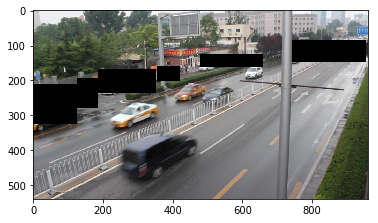

In [0]:
path = "/content/Insight-MVT_Annotation_Train_Masked/MVI_40152/img00003.jpg"

image = Image.open(path)
fig, ax = plt.subplots()
image = np.array(image)

ax.imshow(image)

#creating train csv  and test csv

##traincsv

In [0]:
%cd /content/


/content


In [0]:
from google.colab import files

uploaded = files.upload()


Saving MVI_20011.csv to MVI_20011.csv
Saving MVI_20012.csv to MVI_20012.csv


In [0]:
!ls

 adc.json			      'MVI_20011 (1).csv'   MVI_40141.csv
 DETRAC-test-data.zip		       MVI_20011.csv	    MVI_40141_i.csv
 DETRAC-Train-Annotations-MAT.zip      MVI_20011_i.csv	    MVI_40152.csv
 DETRAC-Train-Annotations-XML	       MVI_20011.xml	    MVI_40152_i.csv
 DETRAC-Train-Annotations-XML.zip      MVI_20012.csv	    MVI_40161.csv
 DETRAC-train-data.zip		       MVI_20012_i.csv	    MVI_40161_i.csv
 gdrive				       MVI_20035.csv	    object_detection
 Insight-MVT_Annotation_Train	       MVI_20035_i.csv	    sample_data
 Insight-MVT_Annotation_Train_Masked   MVI_39861.csv
 models				       MVI_39861_i.csv


In [0]:
Trainfolders = ['MVI_20011','MVI_20012', 'MVI_20035',  'MVI_40141' ,'MVI_40152', 'MVI_40161' ]

Testfolders = [ 'MVI_39861']

column_name = ['left','top' , 'width', 'height', 'num' , 'id', 'vechicle_type']
label_map = {'1': 'Car', '2':'bus','3':'truck','4':'van','5':'others'}


In [0]:
mainpath = '/content/Insight-MVT_Annotation_Train/'

In [0]:
FinalDF = pd.DataFrame()

In [0]:
for train in Trainfolders:

  fnames = train + '.csv'
  #for every 
  df = pd.read_csv(fnames , header = None,names = column_name)


  path = mainpath + train


  filenames = []
  filenames =  sorted(os.listdir(path))

  count_file = []
  for i , f in enumerate(filenames):
    
    f =  train + '/' + f 

    for k in df['num']:

      if k == i+1 :

        count_file.append(f)

  df['filename'] = count_file


  Clsname_file = []

  for k in df['vechicle_type']:
    
    Clsname_file.append(label_map[str(k)])


  df['Clsname_file'] = Clsname_file

  New_df  = pd.DataFrame()

  New_df['filename'] = df['filename']
  New_df["width"] = df["width"]
  New_df["height"] = df["height"] 
  New_df['class'] = df["Clsname_file"	]
  New_df['xmin'] = df["left"]
  New_df['ymin'] = df["top"]
  New_df['xmax'] = df["left"] + df["width"]
  New_df['ymax'] = df["top"] + df["height"]

  if FinalDF.empty:

    FinalDF = New_df

  else :

    FinalDF = pd.concat([ FinalDF , New_df ])




In [0]:
FinalDF.head()


filename   width   height  ...     ymin    xmax     ymax
0  MVI_20011/img00001.jpg  160.05  162.200  ...  378.800  752.80  541.000
1  MVI_20011/img00001.jpg   47.20   43.060  ...  120.980  604.85  164.040
2  MVI_20011/img00001.jpg   35.25   30.080  ...   88.270  580.45  118.350
3  MVI_20011/img00001.jpg   28.00   25.925  ...   67.500  536.35   93.425
4  MVI_20011/img00001.jpg   29.55   19.695  ...   70.095  582.55   89.790

[5 rows x 8 columns]

In [0]:
FinalDF.tail()

filename   width   height  ...     ymin    xmax    ymax
6620  MVI_40161/img01488.jpg  251.67  172.200  ...  331.730  705.00  503.93
6621  MVI_40161/img01489.jpg  204.73   96.203  ...   56.267  609.80  152.47
6622  MVI_40161/img01489.jpg  263.93  179.930  ...  341.870  734.33  521.80
6623  MVI_40161/img01490.jpg  205.80   98.070  ...   54.400  610.07  152.47
6624  MVI_40161/img01490.jpg  276.20  189.000  ...  352.000  763.67  541.00

[5 rows x 8 columns]

In [0]:
len(FinalDF)

46577

In [0]:
%cd /content/

FinalDF.to_csv("FinalTrain.csv",index = False)


/content


##trancsv creations tessts 

Donot run this

In [0]:
 Trainfolders = ['MVI_20011','MVI_20012', 'MVI_20035',  'MVI_40141' ,'MVI_40152', 'MVI_40161' ]

Testfolders = [ 'MVI_39861']

In [0]:
mainpath = '/content/Insight-MVT_Annotation_Train/'

In [0]:
column_name = ['left','top' , 'width', 'height', 'num' , 'id', 'vechicle_type']

df = pd.read_csv('MVI_20011.csv' , header = None,names = column_name)

In [0]:
len(df)

7655

In [0]:
df.head()

left      top   width   height  num  id  vechicle_type
0  592.75  378.800  160.05  162.200    1   1              1
1  557.65  120.980   47.20   43.060    1   2              1
2  545.20   88.270   35.25   30.080    1   3              1
3  508.35   67.500   28.00   25.925    1   4              1
4  553.00   70.095   29.55   19.695    1   5              1

In [0]:
filenames = []
filenames =  sorted(os.listdir("/content/Insight-MVT_Annotation_Train/MVI_20011"))

In [0]:
filenames[:5]

['img00001.jpg',
 'img00002.jpg',
 'img00003.jpg',
 'img00004.jpg',
 'img00005.jpg']

In [0]:
count_file = []
for i , f in enumerate(filenames):
  

  for k in df['num']:

    if k == i+1 :

      count_file.append(f)

In [0]:
len(count_file)

7655

In [0]:
df['filename'] = count_file

In [0]:
df.head(15)

left      top   width   height  num  id  vechicle_type      filename
0   592.75  378.800  160.05  162.200    1   1              1  img00001.jpg
1   557.65  120.980   47.20   43.060    1   2              1  img00001.jpg
2   545.20   88.270   35.25   30.080    1   3              1  img00001.jpg
3   508.35   67.500   28.00   25.925    1   4              1  img00001.jpg
4   553.00   70.095   29.55   19.695    1   5              1  img00001.jpg
5   731.10  114.230   52.40   39.950    1   6              1  img00001.jpg
6   902.15  250.120   58.85  107.990    1   7              1  img00001.jpg
7   594.20  391.810  161.50  149.190    2   1              1  img00002.jpg
8   557.70  121.870   48.10   44.120    2   2              1  img00002.jpg
9   545.00   88.530   35.70   30.600    2   3              1  img00002.jpg
10  508.15   67.760   28.20   26.440    2   4              1  img00002.jpg
11  553.35   70.185   29.70   20.035    2   5              1  img00002.jpg
12  729.85  112.940   51.55   39.500    2   6              1  img00002.jpg
13  894.95  238.560   66.05  107.980    2   7              1  img00002.jpg
14  598.55  406.260  162.95  134.740    3   1              1  img00003.jpg

In [0]:
label_map = {'1': 'Car', '2':'bus','3':'truck','4':'van','5':'others'}

In [0]:
Clsname_file = []

for k in df['vechicle_type']:
  
  Clsname_file.append(label_map[str(k)])

In [0]:
len(Clsname_file)

7655

In [0]:
df['Clsname_file'] = Clsname_file

In [0]:
New_df  = pd.DataFrame()

In [0]:
New_df['filename'] = df['filename']
New_df["width"] = df["width"]
New_df["height"] = df["height"] 
New_df['class'] = df["Clsname_file"	]
New_df['xmin'] = df["left"]
New_df['ymin'] = df["top"]
New_df['xmax'] = df["left"] + df["width"]
New_df['ymax'] = df["top"] + df["height"]


In [0]:
New_df.head()

filename   width   height class    xmin     ymin    xmax     ymax
0  img00001.jpg  160.05  162.200   Car  592.75  378.800  752.80  541.000
1  img00001.jpg   47.20   43.060   Car  557.65  120.980  604.85  164.040
2  img00001.jpg   35.25   30.080   Car  545.20   88.270  580.45  118.350
3  img00001.jpg   28.00   25.925   Car  508.35   67.500  536.35   93.425
4  img00001.jpg   29.55   19.695   Car  553.00   70.095  582.55   89.790

In [0]:
New_df.to_csv("MVI_20011_F.csv",index = False)

In [0]:
cg = pd.read_csv("MVI_20011_F.csv")

cg.head()

filename   width   height class    xmin     ymin    xmax     ymax
0  img00001.jpg  160.05  162.200   Car  592.75  378.800  752.80  541.000
1  img00001.jpg   47.20   43.060   Car  557.65  120.980  604.85  164.040
2  img00001.jpg   35.25   30.080   Car  545.20   88.270  580.45  118.350
3  img00001.jpg   28.00   25.925   Car  508.35   67.500  536.35   93.425
4  img00001.jpg   29.55   19.695   Car  553.00   70.095  582.55   89.790

##testcsv

In [0]:
%cd /content/

/content


In [0]:
from google.colab import files

uploaded = files.upload()


In [0]:
!ls

 adc.json			       models		    MVI_39861_i.csv
 DETRAC-test-data.zip		      'MVI_20011 (1).csv'   MVI_40141.csv
 DETRAC-Train-Annotations-MAT.zip      MVI_20011.csv	    MVI_40141_i.csv
 DETRAC-Train-Annotations-XML	       MVI_20011_i.csv	    MVI_40152.csv
 DETRAC-Train-Annotations-XML.zip      MVI_20011.xml	    MVI_40152_i.csv
 DETRAC-train-data.zip		       MVI_20012.csv	    MVI_40161.csv
 FinalTrain.csv			       MVI_20012_i.csv	    MVI_40161_i.csv
 gdrive				       MVI_20035.csv	    object_detection
 Insight-MVT_Annotation_Train	       MVI_20035_i.csv	    sample_data
 Insight-MVT_Annotation_Train_Masked   MVI_39861.csv


In [0]:

column_name = ['left','top' , 'width', 'height', 'num' , 'id', 'vechicle_type']

df = pd.read_csv('MVI_39861.csv' , header = None,names = column_name)

In [0]:
len(df)

2394

In [0]:
df.head()

left     top   width  height  num  id  vechicle_type
0  152.53  395.73  296.47  131.14    1   1              1
1  746.67  215.47  177.00   95.93    1   2              1
2  346.67  132.27  274.06  185.53    1   3              2
3  324.27  113.07   40.46   25.53    1   4              1
4  155.52  392.96  298.17  133.91    2   1              1

In [0]:
filenames = []
filenames =  sorted(os.listdir("/content/Insight-MVT_Annotation_Train/MVI_20012"))

In [0]:
filenames[:5]

['img00001.jpg',
 'img00002.jpg',
 'img00003.jpg',
 'img00004.jpg',
 'img00005.jpg']

In [0]:
count_file = []
for i , f in enumerate(filenames):

  for k in df['num']:

    if k == i+1 :

      count_file.append(f)

In [0]:
len(count_file)

2394

In [0]:
df['filename'] = count_file

In [0]:
df.head(15)

left     top   width  height  num  id  vechicle_type      filename
0   152.53  395.73  296.47  131.14    1   1              1  img00001.jpg
1   746.67  215.47  177.00   95.93    1   2              1  img00001.jpg
2   346.67  132.27  274.06  185.53    1   3              2  img00001.jpg
3   324.27  113.07   40.46   25.53    1   4              1  img00001.jpg
4   155.52  392.96  298.17  133.91    2   1              1  img00002.jpg
5   760.11  222.08  169.32   95.72    2   2              1  img00002.jpg
6   349.87  132.91  277.90  188.52    2   3              2  img00002.jpg
7   327.04  113.71   41.11   26.38    2   4              1  img00002.jpg
8   158.51  390.19  299.88  136.68    3   1              1  img00003.jpg
9   773.55  228.69  161.64   95.51    3   2              1  img00003.jpg
10  353.07  133.55  281.74  191.50    3   3              2  img00003.jpg
11  329.81  114.35   41.75   27.24    3   4              1  img00003.jpg
12  161.49  387.41  301.59  139.46    4   1              1  img00004.jpg
13  786.99  235.31  153.96   95.29    4   2              1  img00004.jpg
14  356.27  134.19  285.58  194.49    4   3              2  img00004.jpg

In [0]:
label_map = {'1': 'Car', '2':'bus','3':'truck','4':'van','5':'others'}

In [0]:
Clsname_file = []

for k in df['vechicle_type']:
  
  Clsname_file.append(label_map[str(k)])

In [0]:
len(Clsname_file)

2394

In [0]:
df['Clsname_file'] = Clsname_file

In [0]:
New_df  = pd.DataFrame()

In [0]:
New_df['filename'] = df['filename']
New_df["width"] = df["width"]
New_df["height"] = df["height"] 
New_df['class'] = df["Clsname_file"	]
New_df['xmin'] = df["left"]
New_df['ymin'] = df["top"]
New_df['xmax'] = df["left"] + df["width"]
New_df['ymax'] = df["top"] + df["height"]


In [0]:
New_df.head()

filename   width  height class    xmin    ymin    xmax    ymax
0  img00001.jpg  296.47  131.14   Car  152.53  395.73  449.00  526.87
1  img00001.jpg  177.00   95.93   Car  746.67  215.47  923.67  311.40
2  img00001.jpg  274.06  185.53   bus  346.67  132.27  620.73  317.80
3  img00001.jpg   40.46   25.53   Car  324.27  113.07  364.73  138.60
4  img00002.jpg  298.17  133.91   Car  155.52  392.96  453.69  526.87

In [0]:
New_df.to_csv("MVI_39861_F.csv",index = False)

In [0]:
cg = pd.read_csv("MVI_39861_F.csv")

cg.head()

filename   width  height class    xmin    ymin    xmax    ymax
0  img00001.jpg  296.47  131.14   Car  152.53  395.73  449.00  526.87
1  img00001.jpg  177.00   95.93   Car  746.67  215.47  923.67  311.40
2  img00001.jpg  274.06  185.53   bus  346.67  132.27  620.73  317.80
3  img00001.jpg   40.46   25.53   Car  324.27  113.07  364.73  138.60
4  img00002.jpg  298.17  133.91   Car  155.52  392.96  453.69  526.87

#Training obect detector

In [0]:
!pwd

/content


In [0]:
os.mkdir('data')
!ls

 adc.json			       models		    MVI_39861_i.csv
 data				      'MVI_20011 (1).csv'   MVI_40141.csv
 DETRAC-test-data.zip		       MVI_20011.csv	    MVI_40141_i.csv
 DETRAC-Train-Annotations-MAT.zip      MVI_20011_i.csv	    MVI_40152.csv
 DETRAC-Train-Annotations-XML	       MVI_20011.xml	    MVI_40152_i.csv
 DETRAC-Train-Annotations-XML.zip      MVI_20012.csv	    MVI_40161.csv
 DETRAC-train-data.zip		       MVI_20012_i.csv	    MVI_40161_i.csv
 FinalTrain.csv			       MVI_20035.csv	    object_detection
 gdrive				       MVI_20035_i.csv	    sample_data
 Insight-MVT_Annotation_Train	       MVI_39861.csv
 Insight-MVT_Annotation_Train_Masked   MVI_39861_F.csv


In [0]:
%cd /content/data/

!ls

/content/data


In [0]:
label_map = {'1': 'Car', '2':'bus','3':'truck','4':'van','5':'others'}

In [0]:
%%writefile labelmap.pbtxt

item {
    id: 1
    name: 'Car'
}

item {
    id: 2
    name: 'bus'
}
item {
    id: 3
    name: 'truck'
}
item {
    id: 4
    name: 'van'
}
item {
    id: 5
    name: 'others'
}


Writing labelmap.pbtxt


In [0]:
!ls

labelmap.pbtxt


##Tensorflow training

In [0]:
%cd /content/
!ls

/content
 adc.json			       models		    MVI_39861_i.csv
 data				      'MVI_20011 (1).csv'   MVI_40141.csv
 DETRAC-test-data.zip		       MVI_20011.csv	    MVI_40141_i.csv
 DETRAC-Train-Annotations-MAT.zip      MVI_20011_i.csv	    MVI_40152.csv
 DETRAC-Train-Annotations-XML	       MVI_20011.xml	    MVI_40152_i.csv
 DETRAC-Train-Annotations-XML.zip      MVI_20012.csv	    MVI_40161.csv
 DETRAC-train-data.zip		       MVI_20012_i.csv	    MVI_40161_i.csv
 FinalTrain.csv			       MVI_20035.csv	    object_detection
 gdrive				       MVI_20035_i.csv	    sample_data
 Insight-MVT_Annotation_Train	       MVI_39861.csv
 Insight-MVT_Annotation_Train_Masked   MVI_39861_F.csv


In [0]:


from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf
import sys

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

def class_text_to_int(row_label):
    if row_label == 'Car':
      return 1
    elif row_label == 'bus':
      return 2
    elif row_label == 'truck':
      return 3
    elif row_label == 'van':
      return 4
    elif row_label == 'others':
      return 5
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    # check if the image format is matching with your images.
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example


In [0]:
writer = tf.python_io.TFRecordWriter('data/train.record')
path = os.path.join(os.getcwd(), 'Insight-MVT_Annotation_Train_Masked/')
examples = pd.read_csv('FinalTrain.csv')
grouped = split(examples, 'filename')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())

writer.close()
output_path = os.path.join(os.getcwd(), 'data/train.record')
print('Successfully created the TFRecords: {}'.format(output_path))

Successfully created the TFRecords: /content/data/train.record


In [0]:
writer = tf.python_io.TFRecordWriter('data/test.record')
path = os.path.join(os.getcwd(), 'Insight-MVT_Annotation_Train_Masked/MVI_39861')
examples = pd.read_csv('MVI_39861_F.csv')
grouped = split(examples, 'filename')
for group in grouped:
    tf_example = create_tf_example(group, path)
    writer.write(tf_example.SerializeToString())

writer.close()
output_path = os.path.join(os.getcwd(), 'data/test.record')
print('Successfully created the TFRecords: {}'.format(output_path))

Successfully created the TFRecords: /content/data/test.record


In [0]:
models = ['faster_rcnn_resnet101_coco_2018_01_28']


In [0]:
import six.moves.urllib as urllib
import sys

def download_model(MODEL_NAME):
    MODEL_FILE = MODEL_NAME + '.tar.gz'
    DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

    opener = urllib.request.URLopener()
    opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
    
for m in models:
  download_model(m)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: URLopener style of invoking requests is deprecated. Use newer urlopen functions/methods
  if sys.path[0] == '':


In [0]:
model = 'faster_rcnn_resnet101_coco'

In [0]:
!tar -xzvf '{model}_2018_01_28.tar.gz'

faster_rcnn_resnet101_coco_2018_01_28/
faster_rcnn_resnet101_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet101_coco_2018_01_28/checkpoint
faster_rcnn_resnet101_coco_2018_01_28/pipeline.config
faster_rcnn_resnet101_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet101_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet101_coco_2018_01_28/saved_model/
faster_rcnn_resnet101_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet101_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet101_coco_2018_01_28/frozen_inference_graph.pb


In [0]:
!ls

 adc.json				        MVI_20011.xml
 data					        MVI_20012.csv
 DETRAC-test-data.zip			        MVI_20012_i.csv
 DETRAC-Train-Annotations-MAT.zip	        MVI_20035.csv
 DETRAC-Train-Annotations-XML		        MVI_20035_i.csv
 DETRAC-Train-Annotations-XML.zip	        MVI_39861.csv
 DETRAC-train-data.zip			        MVI_39861_F.csv
 faster_rcnn_resnet101_coco_2018_01_28	        MVI_39861_i.csv
 faster_rcnn_resnet101_coco_2018_01_28.tar.gz   MVI_40141.csv
 FinalTrain.csv				        MVI_40141_i.csv
 gdrive					        MVI_40152.csv
 Insight-MVT_Annotation_Train		        MVI_40152_i.csv
 Insight-MVT_Annotation_Train_Masked	        MVI_40161.csv
 models					        MVI_40161_i.csv
'MVI_20011 (1).csv'			        object_detection
 MVI_20011.csv				        sample_data
 MVI_20011_i.csv


In [0]:
import re

filename = f'/content/object_detection/samples/configs/{model}.config'
with open(filename) as f:
  s = f.read()

filename = f'/content/{model}.config'  
with open(filename, 'w') as f:
  s = re.sub('num_classes: 90', 'num_classes: 5', s)
  s = re.sub('iou_threshold: 0.6', 'iou_threshold: 0.3', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/model.ckpt', '/content/faster_rcnn_resnet101_coco_2018_01_28/model.ckpt', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/mscoco_label_map.pbtxt', '/content/data/labelmap.pbtxt', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/mscoco_train.record-\?\?\?\?\?-of-00100', '/content/data/train.record', s)
  s = re.sub('PATH_TO_BE_CONFIGURED/mscoco_val.record-\?\?\?\?\?-of-00010', '/content/data/test.record', s)
  s = re.sub('batch_size: 1', 'batch_size: 5', s)
  s = re.sub('num_examples: 8000', 'num_examples: 10', s)
  s = re.sub('max_evals: 10', 'max_evals: 2', s)

  f.write(s)


In [0]:
cat faster_rcnn_resnet101_coco.config

# Faster R-CNN with Resnet-101 (v1), configuration for MSCOCO Dataset.
# Users should configure the fine_tune_checkpoint field in the train config as
# well as the label_map_path and input_path fields in the train_input_reader and
# eval_input_reader. Search for "PATH_TO_BE_CONFIGURED" to find the fields that
# should be configured.

model {
  faster_rcnn {
    num_classes: 5
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 600
        max_dimension: 1024
      }
    }
    feature_extractor {
      type: 'faster_rcnn_resnet101'
      first_stage_features_stride: 16
    }
    first_stage_anchor_generator {
      grid_anchor_generator {
        scales: [0.25, 0.5, 1.0, 2.0]
        aspect_ratios: [0.5, 1.0, 2.0]
        height_stride: 16
        width_stride: 16
      }
    }
    first_stage_box_predictor_conv_hyperparams {
      op: CONV
      regularizer {
        l2_regularizer {
          weight: 0.0
        }
      }
      initializer {
        truncated_

In [0]:
NUM_TRAIN_STEPS=1000


In [0]:
!python /content/object_detection/model_main.py \
     --pipeline_config_path=/content/faster_rcnn_resnet101_coco.config \
     --model_dir=/content/data/new_weights \
     --alsologtostderr \
     --num_train_steps=$NUM_TRAIN_STEPS 

W0820 12:12:56.654587 140479960668032 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0820 12:12:56.922296 140479960668032 deprecation_wrapper.py:119] From /content/models/research/slim/nets/inception_resnet_v2.py:373: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0820 12:12:57.003063 140479960668032 deprecation_wrapper.py:119] From /content/models/research/slim/nets/mobilenet/mobilenet.py:397: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.

W0820 12:12:57.083162 140479960668032 deprecation_wrapper.py:119] From /content/object_detection/model_main.py:109: The name tf.app.run is deprecated. P

####save data and masked folders

In [0]:
%cd /content/

!ls

/content
 adc.json				        MVI_20011_i.csv
 data					        MVI_20011.xml
 data.tar.gz				        MVI_20012.csv
 DETRAC-test-data.zip			        MVI_20012_i.csv
 DETRAC-Train-Annotations-MAT.zip	        MVI_20035.csv
 DETRAC-Train-Annotations-XML		        MVI_20035_i.csv
 DETRAC-Train-Annotations-XML.zip	        MVI_39861.csv
 DETRAC-train-data.zip			        MVI_39861_F.csv
 faster_rcnn_resnet101_coco_2018_01_28	        MVI_39861_i.csv
 faster_rcnn_resnet101_coco_2018_01_28.tar.gz   MVI_40141.csv
 faster_rcnn_resnet101_coco.config	        MVI_40141_i.csv
 FinalTrain.csv				        MVI_40152.csv
 gdrive					        MVI_40152_i.csv
 Insight-MVT_Annotation_Train		        MVI_40161.csv
 Insight-MVT_Annotation_Train_Masked	        MVI_40161_i.csv
 models					        object_detection
'MVI_20011 (1).csv'			        sample_data
 MVI_20011.csv


In [0]:
!tar -czf  data.tar.gz  data

tar: Removing leading `/' from member names


In [0]:
f = "data.tar.gz"
uploaded = driveauth.CreateFile()
uploaded.SetContentFile(f)
uploaded.Upload()
print('Uploaded file %s with ID %s'%(f, uploaded.get('id')))

Uploaded file data.tar.gz with ID 1mD3BwG_UR90VaFAJTxI7I3uRDbv8ZYeQ


In [0]:
!tar -czf  Insight-MVT_Annotation_Train_Masked.tar.gz  Insight-MVT_Annotation_Train_Masked

tar: Removing leading `/' from member names


In [0]:
f = "Insight-MVT_Annotation_Train_Masked.tar.gz"
uploaded = driveauth.CreateFile()
uploaded.SetContentFile(f)
uploaded.Upload()
print('Uploaded file %s with ID %s'%(f, uploaded.get('id')))

Uploaded file Insight-MVT_Annotation_Train_Masked.tar.gz with ID 1jR_R-FzYA7vfcn5WIUmISSqs5lrdIAwt


###getting last trained model

In [0]:
 import os
lst = os.listdir('/content/data/new_weights')
lf = filter(lambda k: 'model.ckpt-' in k, lst)
last_model = sorted(lf)[-1].replace('.meta', '')
last_model

'model.ckpt-933'

In [0]:
last_model = 'model.ckpt-933'

In [0]:
!ls

 adc.json				        MVI_20011_i.csv
 data					        MVI_20011.xml
 DETRAC-test-data.zip			        MVI_20012.csv
 DETRAC-Train-Annotations-MAT.zip	        MVI_20012_i.csv
 DETRAC-Train-Annotations-XML		        MVI_20035.csv
 DETRAC-Train-Annotations-XML.zip	        MVI_20035_i.csv
 DETRAC-train-data.zip			        MVI_39861.csv
 faster_rcnn_resnet101_coco_2018_01_28	        MVI_39861_F.csv
 faster_rcnn_resnet101_coco_2018_01_28.tar.gz   MVI_39861_i.csv
 faster_rcnn_resnet101_coco.config	        MVI_40141.csv
 FinalTrain.csv				        MVI_40141_i.csv
 gdrive					        MVI_40152.csv
 Insight-MVT_Annotation_Train		        MVI_40152_i.csv
 Insight-MVT_Annotation_Train_Masked	        MVI_40161.csv
 models					        MVI_40161_i.csv
'MVI_20011 (1).csv'			        object_detection
 MVI_20011.csv				        sample_data


In [0]:
%run /content/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path='/content/{model}.config' \
    --trained_checkpoint_prefix=/content/data/new_weights/$last_model \
    --output_directory=/content/data/new_output_inference_graphs

## Inference

In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import time
import random
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from object_detection.utils import ops as utils_ops
from PIL import Image
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
%matplotlib inline

# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.

#with trained checkpoint
PATH_TO_CKPT = '/content/data/new_output_inference_graphs' + '/frozen_inference_graph.pb'

#with no training check
#PATH_TO_CKPT = '/content/faster_rcnn_resnet101_coco_2018_01_28/frozen_inference_graph.pb'


# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/content/data', 'labelmap.pbtxt')

NUM_CLASSES = 5

In [0]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/content/Insight-MVT_Annotation_Train_Masked/MVI_39861'
rnd_images = random.sample(os.listdir(PATH_TO_TEST_IMAGES_DIR), 5)
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, rnd_images[i]) for i in range(5) ]

# test_images = os.listdir(PATH_TO_TEST_IMAGES_DIR)
# TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, test_images[i]) for i in range(len(test_images)) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (20, 15)


In [0]:
#TEST_IMAGE_PATHS = ["/content/test_a_image.jpeg"]

In [0]:
def inference_and_plot(detection_graph):
    with detection_graph.as_default():
      with tf.Session(graph=detection_graph) as sess:
        
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for image_path in TEST_IMAGE_PATHS:
            
            start_time = time.time()
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            
            print(type(boxes))

            end_time = time.time()
            
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=3)
            
            plt.figure(figsize=IMAGE_SIZE)
            plt.grid(visible=False)
            #plt.xticks([])
            #plt.yticks([])
            plt.imshow(image_np)
            plt.show()
            
            print ('Time taken: ', (end_time-start_time))

<class 'numpy.ndarray'>


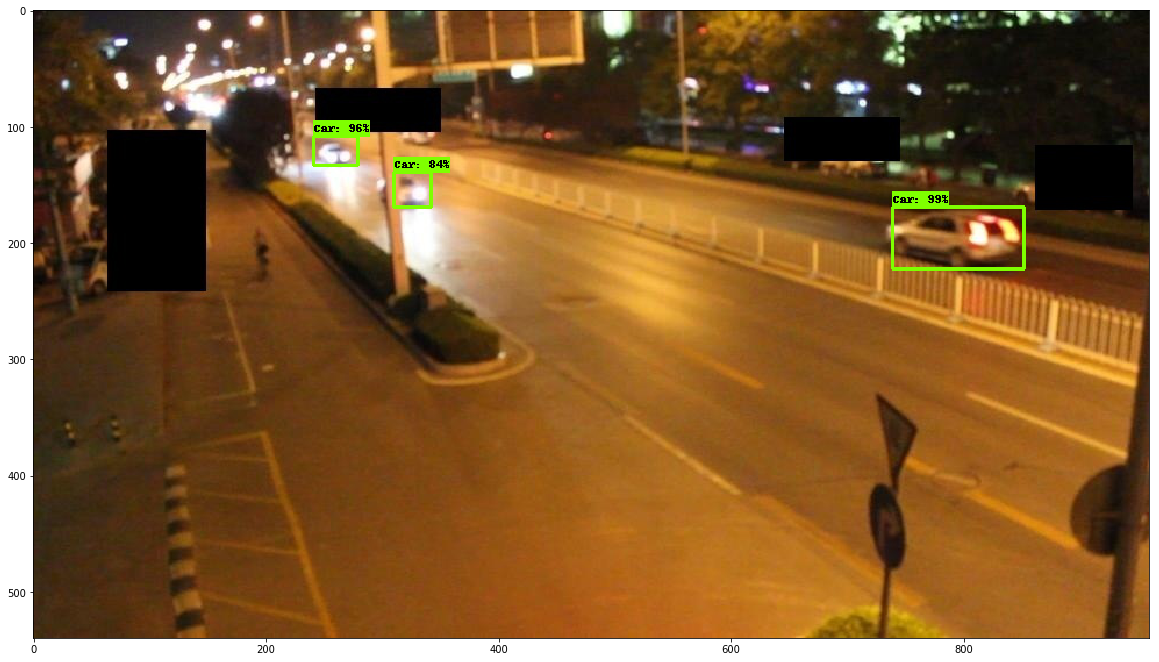

Time taken:  8.604891300201416
<class 'numpy.ndarray'>


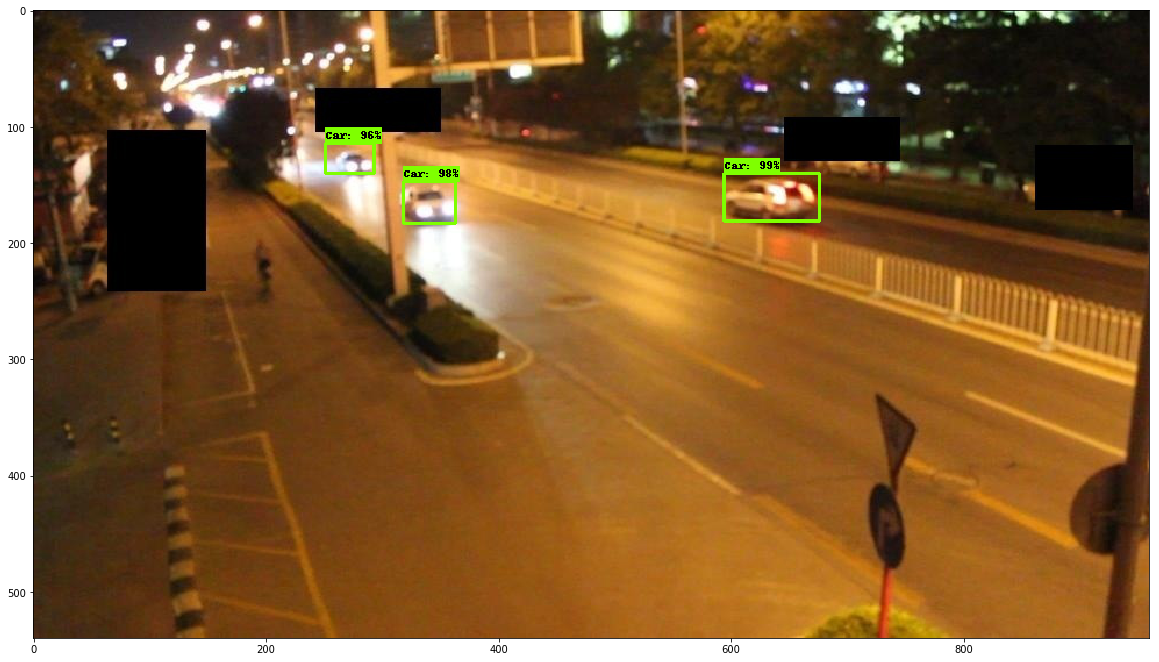

Time taken:  1.0702943801879883
<class 'numpy.ndarray'>


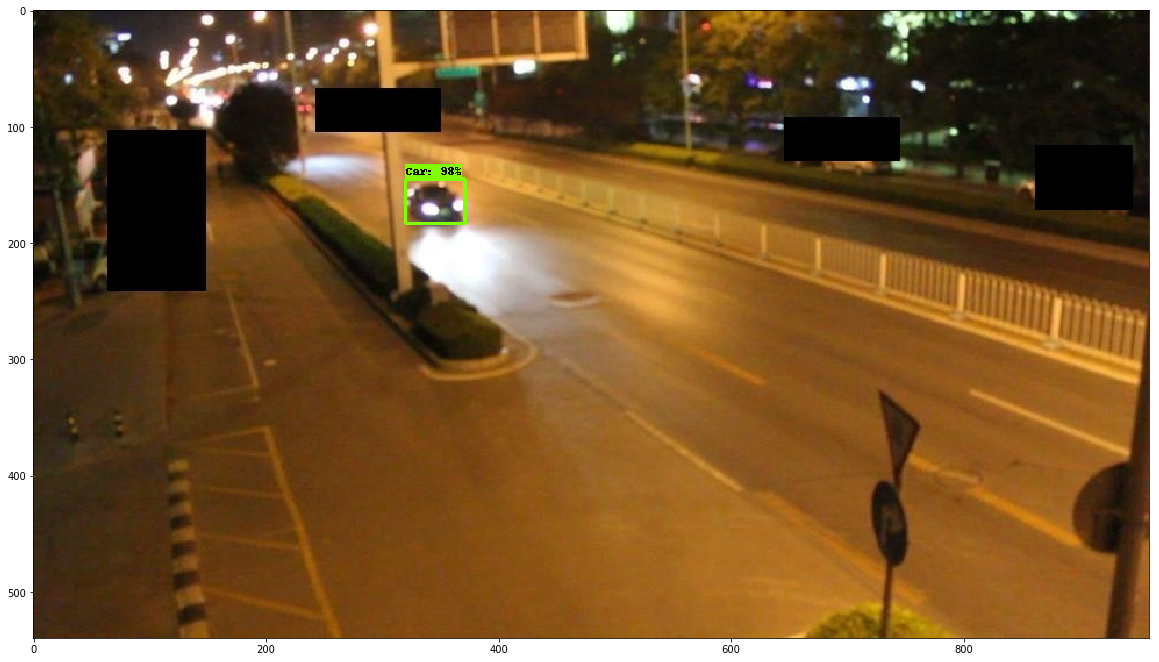

Time taken:  1.0213651657104492
<class 'numpy.ndarray'>


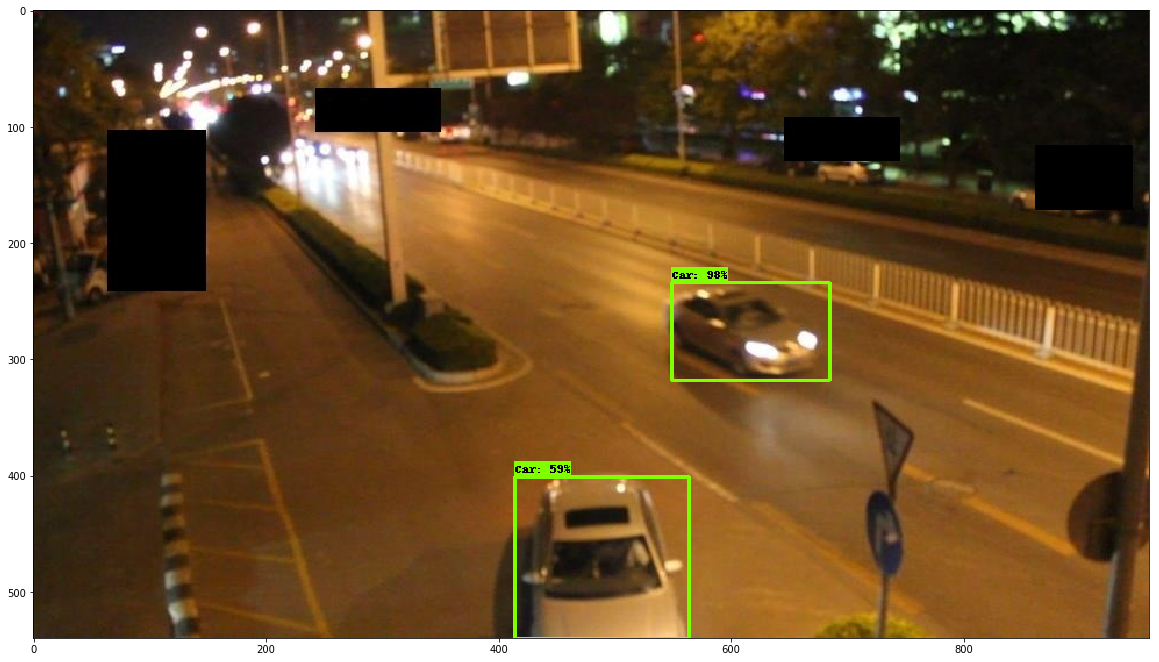

Time taken:  1.0396473407745361
<class 'numpy.ndarray'>


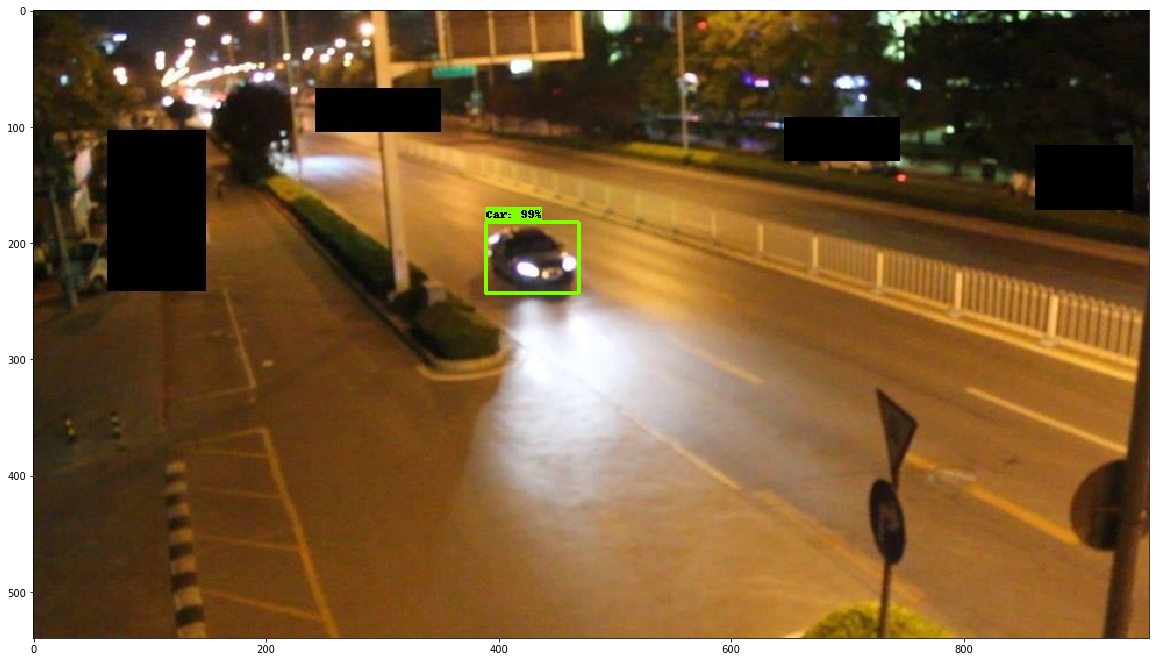

Time taken:  1.063533067703247


In [0]:
inference_and_plot(detection_graph)

In [0]:
!ls

adc.json				      gdrive
data					      Insight-MVT_Annotation_Train
DETRAC-test-data.zip			      models
DETRAC-Train-Annotations-MAT.zip	      MVI_20011.csv
DETRAC-Train-Annotations-XML		      MVI_20011_F.csv
DETRAC-Train-Annotations-XML.zip	      MVI_20012.csv
DETRAC-train-data.zip			      MVI_20012_F.csv
faster_rcnn_resnet101_coco_2018_01_28	      object_detection
faster_rcnn_resnet101_coco_2018_01_28.tar.gz  OpenLongTailRecognition-OLTR
faster_rcnn_resnet101_coco.config	      predictions


In [0]:
!mkdir predictions
!ls

In [0]:
import collections

STANDARD_COLORS = [
    'AliceBlue', 'Chartreuse', 'Aqua', 'Aquamarine', 'Azure', 'Beige', 'Bisque',
    'BlanchedAlmond', 'BlueViolet', 'BurlyWood', 'CadetBlue', 'AntiqueWhite',
    'Chocolate', 'Coral', 'CornflowerBlue', 'Cornsilk', 'Crimson', 'Cyan',
    'DarkCyan', 'DarkGoldenRod', 'DarkGrey', 'DarkKhaki', 'DarkOrange',
    'DarkOrchid', 'DarkSalmon', 'DarkSeaGreen', 'DarkTurquoise', 'DarkViolet',
    'DeepPink', 'DeepSkyBlue', 'DodgerBlue', 'FireBrick', 'FloralWhite',
    'ForestGreen', 'Fuchsia', 'Gainsboro', 'GhostWhite', 'Gold', 'GoldenRod',
    'Salmon', 'Tan', 'HoneyDew', 'HotPink', 'IndianRed', 'Ivory', 'Khaki',
    'Lavender', 'LavenderBlush', 'LawnGreen', 'LemonChiffon', 'LightBlue',
    'LightCoral', 'LightCyan', 'LightGoldenRodYellow', 'LightGray', 'LightGrey',
    'LightGreen', 'LightPink', 'LightSalmon', 'LightSeaGreen', 'LightSkyBlue',
    'LightSlateGray', 'LightSlateGrey', 'LightSteelBlue', 'LightYellow', 'Lime',
    'LimeGreen', 'Linen', 'Magenta', 'MediumAquaMarine', 'MediumOrchid',
    'MediumPurple', 'MediumSeaGreen', 'MediumSlateBlue', 'MediumSpringGreen',
    'MediumTurquoise', 'MediumVioletRed', 'MintCream', 'MistyRose', 'Moccasin',
    'NavajoWhite', 'OldLace', 'Olive', 'OliveDrab', 'Orange', 'OrangeRed',
    'Orchid', 'PaleGoldenRod', 'PaleGreen', 'PaleTurquoise', 'PaleVioletRed',
    'PapayaWhip', 'PeachPuff', 'Peru', 'Pink', 'Plum', 'PowderBlue', 'Purple',
    'Red', 'RosyBrown', 'RoyalBlue', 'SaddleBrown', 'Green', 'SandyBrown',
    'SeaGreen', 'SeaShell', 'Sienna', 'Silver', 'SkyBlue', 'SlateBlue',
    'SlateGray', 'SlateGrey', 'Snow', 'SpringGreen', 'SteelBlue', 'GreenYellow',
    'Teal', 'Thistle', 'Tomato', 'Turquoise', 'Violet', 'Wheat', 'White',
    'WhiteSmoke', 'Yellow', 'YellowGreen'
]

def visualize_boxes_and_labels_on_image_array(
    new_image,
    image,
    image_path,
    boxes,
    classes,
    scores,
    category_index,
    instance_masks=None,
    instance_boundaries=None,
    keypoints=None,
    use_normalized_coordinates=False,
    max_boxes_to_draw=20,
    min_score_thresh=.5,
    agnostic_mode=False,
    line_thickness=4,
    groundtruth_box_visualization_color='black',
    skip_scores=False,
    skip_labels=False):
  # Create a display string (and color) for every box location, group any boxes
  # that correspond to the same location.
  box_to_display_str_map = collections.defaultdict(list)
  clas = collections.defaultdict(list)
  sc = collections.defaultdict(list)
  box_to_color_map = collections.defaultdict(str)
  box_to_instance_masks_map = {}
  box_to_instance_boundaries_map = {}
  box_to_keypoints_map = collections.defaultdict(list)
  if not max_boxes_to_draw:
    max_boxes_to_draw = boxes.shape[0]
  for i in range(min(max_boxes_to_draw, boxes.shape[0])):
    if scores is None or scores[i] > min_score_thresh:
      box = tuple(boxes[i].tolist())
      if instance_masks is not None:
        box_to_instance_masks_map[box] = instance_masks[i]
      if instance_boundaries is not None:
        box_to_instance_boundaries_map[box] = instance_boundaries[i]
      if keypoints is not None:
        box_to_keypoints_map[box].extend(keypoints[i])
      if scores is None:
        box_to_color_map[box] = groundtruth_box_visualization_color
      else:
        display_str = ''
        if not skip_labels:
          if not agnostic_mode:
            if classes[i] in category_index.keys():
              class_name = category_index[classes[i]]['name']
            else:
              class_name = 'N/A'
            display_str = str(class_name)
          clas[box].append(int(classes[i]))
        if not skip_scores:
          if not display_str:
            display_str = '{}%'.format(int(100*scores[i]))
          else:
            display_str = '{}: {}%'.format(display_str, int(100*scores[i]))
        box_to_display_str_map[box].append(display_str)
        sc[box].append(scores[i])
        if agnostic_mode:
          box_to_color_map[box] = 'DarkOrange'
        else:
          box_to_color_map[box] = STANDARD_COLORS[classes[i] % len(STANDARD_COLORS)]      
      
  width, height = new_image.size
#   for box, color in box_to_color_map.items():
    
#     ymin, xmin, ymax, xmax = box
#     ymin = ymin*height
#     xmin = xmin*width
#     ymax = ymax*height
#     xmax = xmax*width
#     print('{} {} {} {} {} {}'.format(clas[box][0], sc[box][0], ymin, xmin, ymax, xmax))
 
  out_file = open('/content/predictions/%s.txt'%(image_path.split('/')[-1].split('.')[0]), 'w')
  
  for box, color in box_to_color_map.items():

    ymin, xmin, ymax, xmax = box
    ymin = ymin*height
    xmin = xmin*width
    ymax = ymax*height
    xmax = xmax*width
    out_file.write('{} {} {} {} {} {}\n'.format(clas[box][0], sc[box][0], ymin, xmin, ymax, xmax))

  out_file.close()


In [0]:
def inference_and_plot(detection_graph):
    with detection_graph.as_default():
      with tf.Session(graph=detection_graph) as sess:
        
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for image_path in TEST_IMAGE_PATHS:
            
            start_time = time.time()
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})

            # Visualization of the results of a detection.
            visualize_boxes_and_labels_on_image_array(
                image,
                image_np,
                image_path,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=3)


In [0]:
%time inference_and_plot(detection_graph)

In [0]:
! cp -R "/content/predictions" "/content/drive/My Drive/Colab Notebooks/"

In [0]:
import shutil

shutil.rmtree('/content/predictions')
#shutil.rmtree('/content/data/new_weights')
#shutil.rmtree('/content/data/new_output_inference_graphs')

In [0]:
import os

os.mkdir('/content/predictions')
#os.mkdir('/content/data/new_weights')